In [ ]:
# Description: this program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#                               To predict the closing stock price of a corporation using the past 60 day stock price.

In [ ]:
# Import teh required libraries
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Get the stock quote
company = 'AAPL'
df = web.DataReader(company, data_source='yahoo', start='2012-01-01', end='2021-04-05')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2021-03-29,122.580002,120.730003,121.650002,121.389999,80819200.0,121.389999
2021-03-30,120.400002,118.860001,120.110001,119.900002,85671900.0,119.900002
2021-03-31,123.519997,121.150002,121.650002,122.150002,118323800.0,122.150002


In [ ]:
# Get the number of rows and columns in the data set
df.shape

(2328, 6)

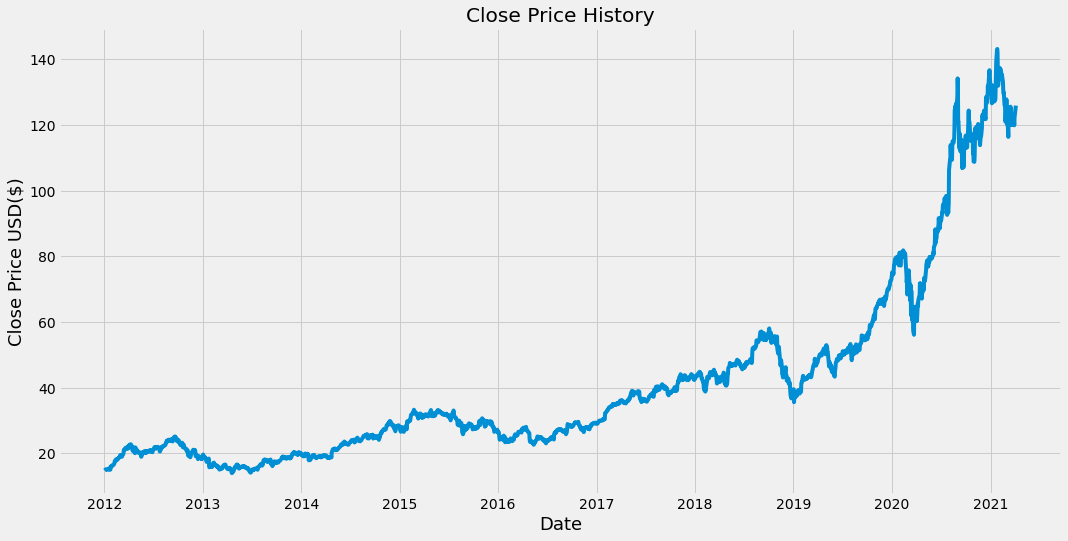

In [ ]:
# Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel("Close Price USD($)", fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len

1863

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.83739962],
       [0.84397792],
       [0.86642158]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00

In [ ]:
# Convert the x_train and y_train in to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1803, 60, 1)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1803/1803 [==============================] - 44s 23ms/step - loss: 3.9185e-04
Epoch 2/5
1803/1803 [==============================] - 39s 21ms/step - loss: 9.6487e-05
Epoch 3/5
1803/1803 [==============================] - 39s 21ms/step - loss: 7.8914e-05
Epoch 4/5
1803/1803 [==============================] - 39s 21ms/step - loss: 6.9570e-05
Epoch 5/5
1803/1803 [==============================] - 39s 21ms/step - loss: 4.9624e-05


In [ ]:
# Create the testing data set
# Create new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
# Convert the data in to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse
from sklearn import metrics
true = y_test
predicted = predictions
ls_mae = metrics.mean_absolute_error(true, predicted)
ls_mse = metrics.mean_squared_error(true, predicted)
ls_rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
ls_r2_square = metrics.r2_score(true, predicted)
print( "Mean Absolute error = ", ls_mae)
print( "Root Mean squared error = ", ls_rmse)
print( "R^2 error = ", ls_r2_square)

3.3489439277238744 19.27916609104316 4.3908047202128175 0.9770712087692434


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


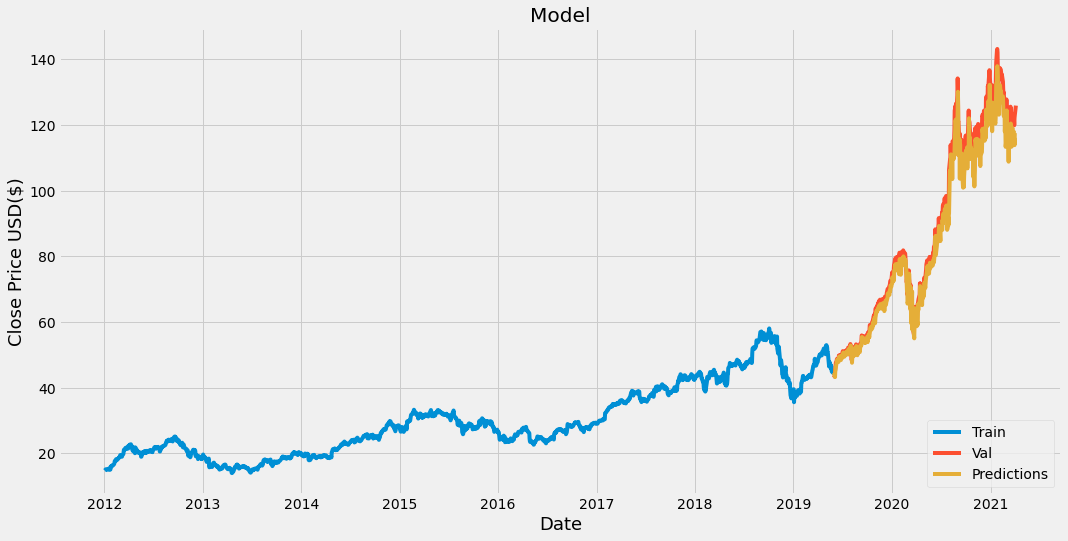

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-05-31,43.767502,44.450878
2019-06-03,43.325001,43.590710
2019-06-04,44.910000,43.196712
2019-06-05,45.634998,44.885117
2019-06-06,46.305000,45.541317
...,...,...
2021-03-29,121.389999,115.863564
2021-03-30,119.900002,115.979935
2021-03-31,122.150002,113.856956


In [ ]:
# Convert the x_train and y_train in to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#x_train.shape
y_train.shape
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1])
x_train.shape

(1803, 60)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=True)
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
# Convert the data in to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1])
x_test.shape
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

(465, 60)

In [ ]:
predictions = model.predict(x_test)
predictions = predictions.reshape( predictions.shape[0], 1)
predictions.shape
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse
from sklearn import metrics
true = y_test
predicted = predictions
lr_mae = metrics.mean_absolute_error(true, predicted)
lr_mse = metrics.mean_squared_error(true, predicted)
lr_rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
lr_r2_square = metrics.r2_score(true, predicted)
print( "Mean Absolute error = ", lr_mae)
print( "Root Mean squared error = ", lr_rmse)
print( "R^2 error = ", lr_r2_square)

1.5585051995140695 5.1006481461099415 2.2584614555289497 0.9939337782593183


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


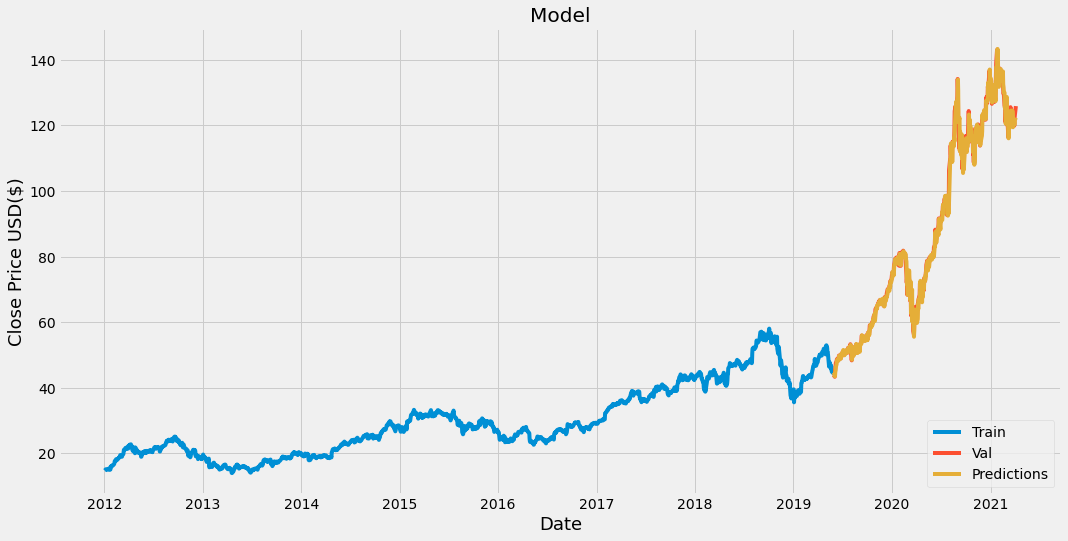

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-05-31,43.767502,44.578836
2019-06-03,43.325001,43.462595
2019-06-04,44.910000,43.515773
2019-06-05,45.634998,44.696419
2019-06-06,46.305000,45.212539
...,...,...
2021-03-29,121.389999,121.336369
2021-03-30,119.900002,120.229047
2021-03-31,122.150002,120.226992


In [ ]:
from prettytable import PrettyTable

lr_metrics = ["Linear Regression", lr_rmse, lr_mae, lr_r2_square]
LSTM_metrics = ["LSTM Model", ls_rmse, ls_mae, ls_r2_square]

l = [ lr_metrics, LSTM_metrics]
table = PrettyTable(['Model', 'RMSE', 'MAE', 'R2'])

for rec in l:
    table.add_row(rec)

print(table)

+-------------------+--------------------+--------------------+--------------------+
|       Model       |        RMSE        |        MAE         |         R2         |
+-------------------+--------------------+--------------------+--------------------+
| Linear Regression | 2.2584614555289497 | 1.5585051995140695 | 0.9939337782593183 |
|     LSTM Model    | 4.3908047202128175 | 3.3489439277238744 | 0.9770712087692434 |
+-------------------+--------------------+--------------------+--------------------+
